## De Bruijn Graphs

(*inspired by Ben Langmead*)

In this notebook, we will make and visualize De Bruijn graphs constructed from genome sequences and from a set of length k reads. 

First up, let's define a function that makes a set of k-1-mer nodes and edges from a genome string. 

In [2]:
def de_bruijn_ize(st, k):
    """ Return a list holding, for each k-mer, its left
        k-1-mer and its right k-1-mer in a pair """
    edges = []
    nodes = set()
    for i in range(len(st) - k + 1):
        edges.append((st[i:i+k-1], st[i+1:i+k]))
        nodes.add(st[i:i+k-1])
        nodes.add(st[i+1:i+k])
    return nodes, edges



Call this function to define the De Bruijn graph for a given "genome" sequence and for a given k-mer length k. 

In [19]:
nodes, edges = de_bruijn_ize("ATGGCGTGCAATG", 4)


In [20]:
nodes

{'AAT', 'ATG', 'CAA', 'CGT', 'GCA', 'GCG', 'GGC', 'GTG', 'TGC', 'TGG'}

In [21]:
edges

[('ATG', 'TGG'),
 ('TGG', 'GGC'),
 ('GGC', 'GCG'),
 ('GCG', 'CGT'),
 ('CGT', 'GTG'),
 ('GTG', 'TGC'),
 ('TGC', 'GCA'),
 ('GCA', 'CAA'),
 ('CAA', 'AAT'),
 ('AAT', 'ATG')]

Let's visualize the graph with the graphviz library. Colab displays a graphviz object as a formatted graph. 

In [8]:
import graphviz

In [9]:
def visualize_de_bruijn(nodes, edges):
    """ Visualize a directed multigraph using graphviz """

    g = graphviz.Digraph(comment='DeBruijn graph')

    for n in nodes:
        g.node(n, n)
    for src, dst in edges:
        g.edge(src, dst)
    return g

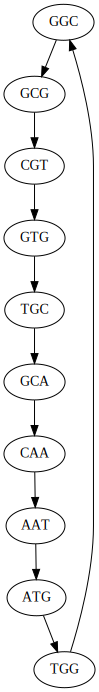

In [22]:
visualize_de_bruijn(nodes, edges)

Okay, next up, let's define a De Bruijn graph from a set of length k reads. 

In [26]:
reads = ["ATGG",
"TGGC",
"GGCG",
"GCGT",
"CGTG",
"GTGC",
"TGCA",
"GCAA",
"CAAT",
"AATG"]


We will define a similar De Bruijn graph construction function, this time taking a list of reads. 

In [27]:
def de_bruijn_ize_reads(reads, k):
    """ Return a list holding, for each k-length read, its left
        k-1-mer and its right k-1-mer in a pair """
    edges = []
    nodes = set()
    for read in reads:
        edges.append((read[:k-1], read[1:k]))
        nodes.add(read[:k-1])
        nodes.add(read[1:k])
    return nodes, edges

In [38]:
nodes2, edges2 = de_bruijn_ize_reads(reads, 4)


In [39]:
nodes2

{'AAT', 'ATG', 'CAA', 'CGT', 'GCA', 'GCG', 'GGC', 'GTG', 'TGC', 'TGG'}

In [40]:
edges2

[('ATG', 'TGG'),
 ('TGG', 'GGC'),
 ('GGC', 'GCG'),
 ('GCG', 'CGT'),
 ('CGT', 'GTG'),
 ('GTG', 'TGC'),
 ('TGC', 'GCA'),
 ('GCA', 'CAA'),
 ('CAA', 'AAT'),
 ('AAT', 'ATG')]

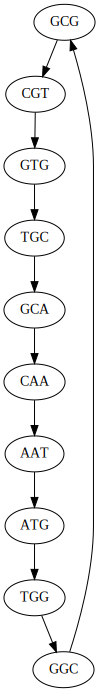

In [42]:
visualize_de_bruijn(nodes2, edges2)